In [38]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [189]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from math import sqrt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("/content/state_weather_aqi_data_mf2.csv")
df

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60,55,20,5,18,29,53,60,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",07-01-2020,03:00:00,163,142,57,7,10,39,8,163,PM2.5
1561,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",07-01-2020,03:00:00,279,215,78,11,23,31,53,279,PM2.5
1562,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",07-01-2020,03:00:00,162,136,43,4,16,34,44,162,PM2.5
1563,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",07-01-2020,03:00:00,213,152,55,5,11,95,64,213,PM2.5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  1565 non-null   object
 1   city                   1565 non-null   object
 2   station                1565 non-null   object
 3   date                   1565 non-null   object
 4   time                   1565 non-null   object
 5   PM2.5                  1565 non-null   int64 
 6   PM10                   1565 non-null   int64 
 7   NO2                    1565 non-null   int64 
 8   NH3                    1565 non-null   int64 
 9   SO2                    1565 non-null   int64 
 10  CO                     1565 non-null   int64 
 11  OZONE                  1565 non-null   int64 
 12  AQI                    1565 non-null   int64 
 13  Predominant_Parameter  1565 non-null   object
dtypes: int64(8), object(6)
memory usage: 171.3+ KB


In [25]:
df.isnull().sum()

,0
state,0
city,0
station,0
date,0
time,0
PM2.5,0
PM10,0
NO2,0
NH3,0
SO2,0


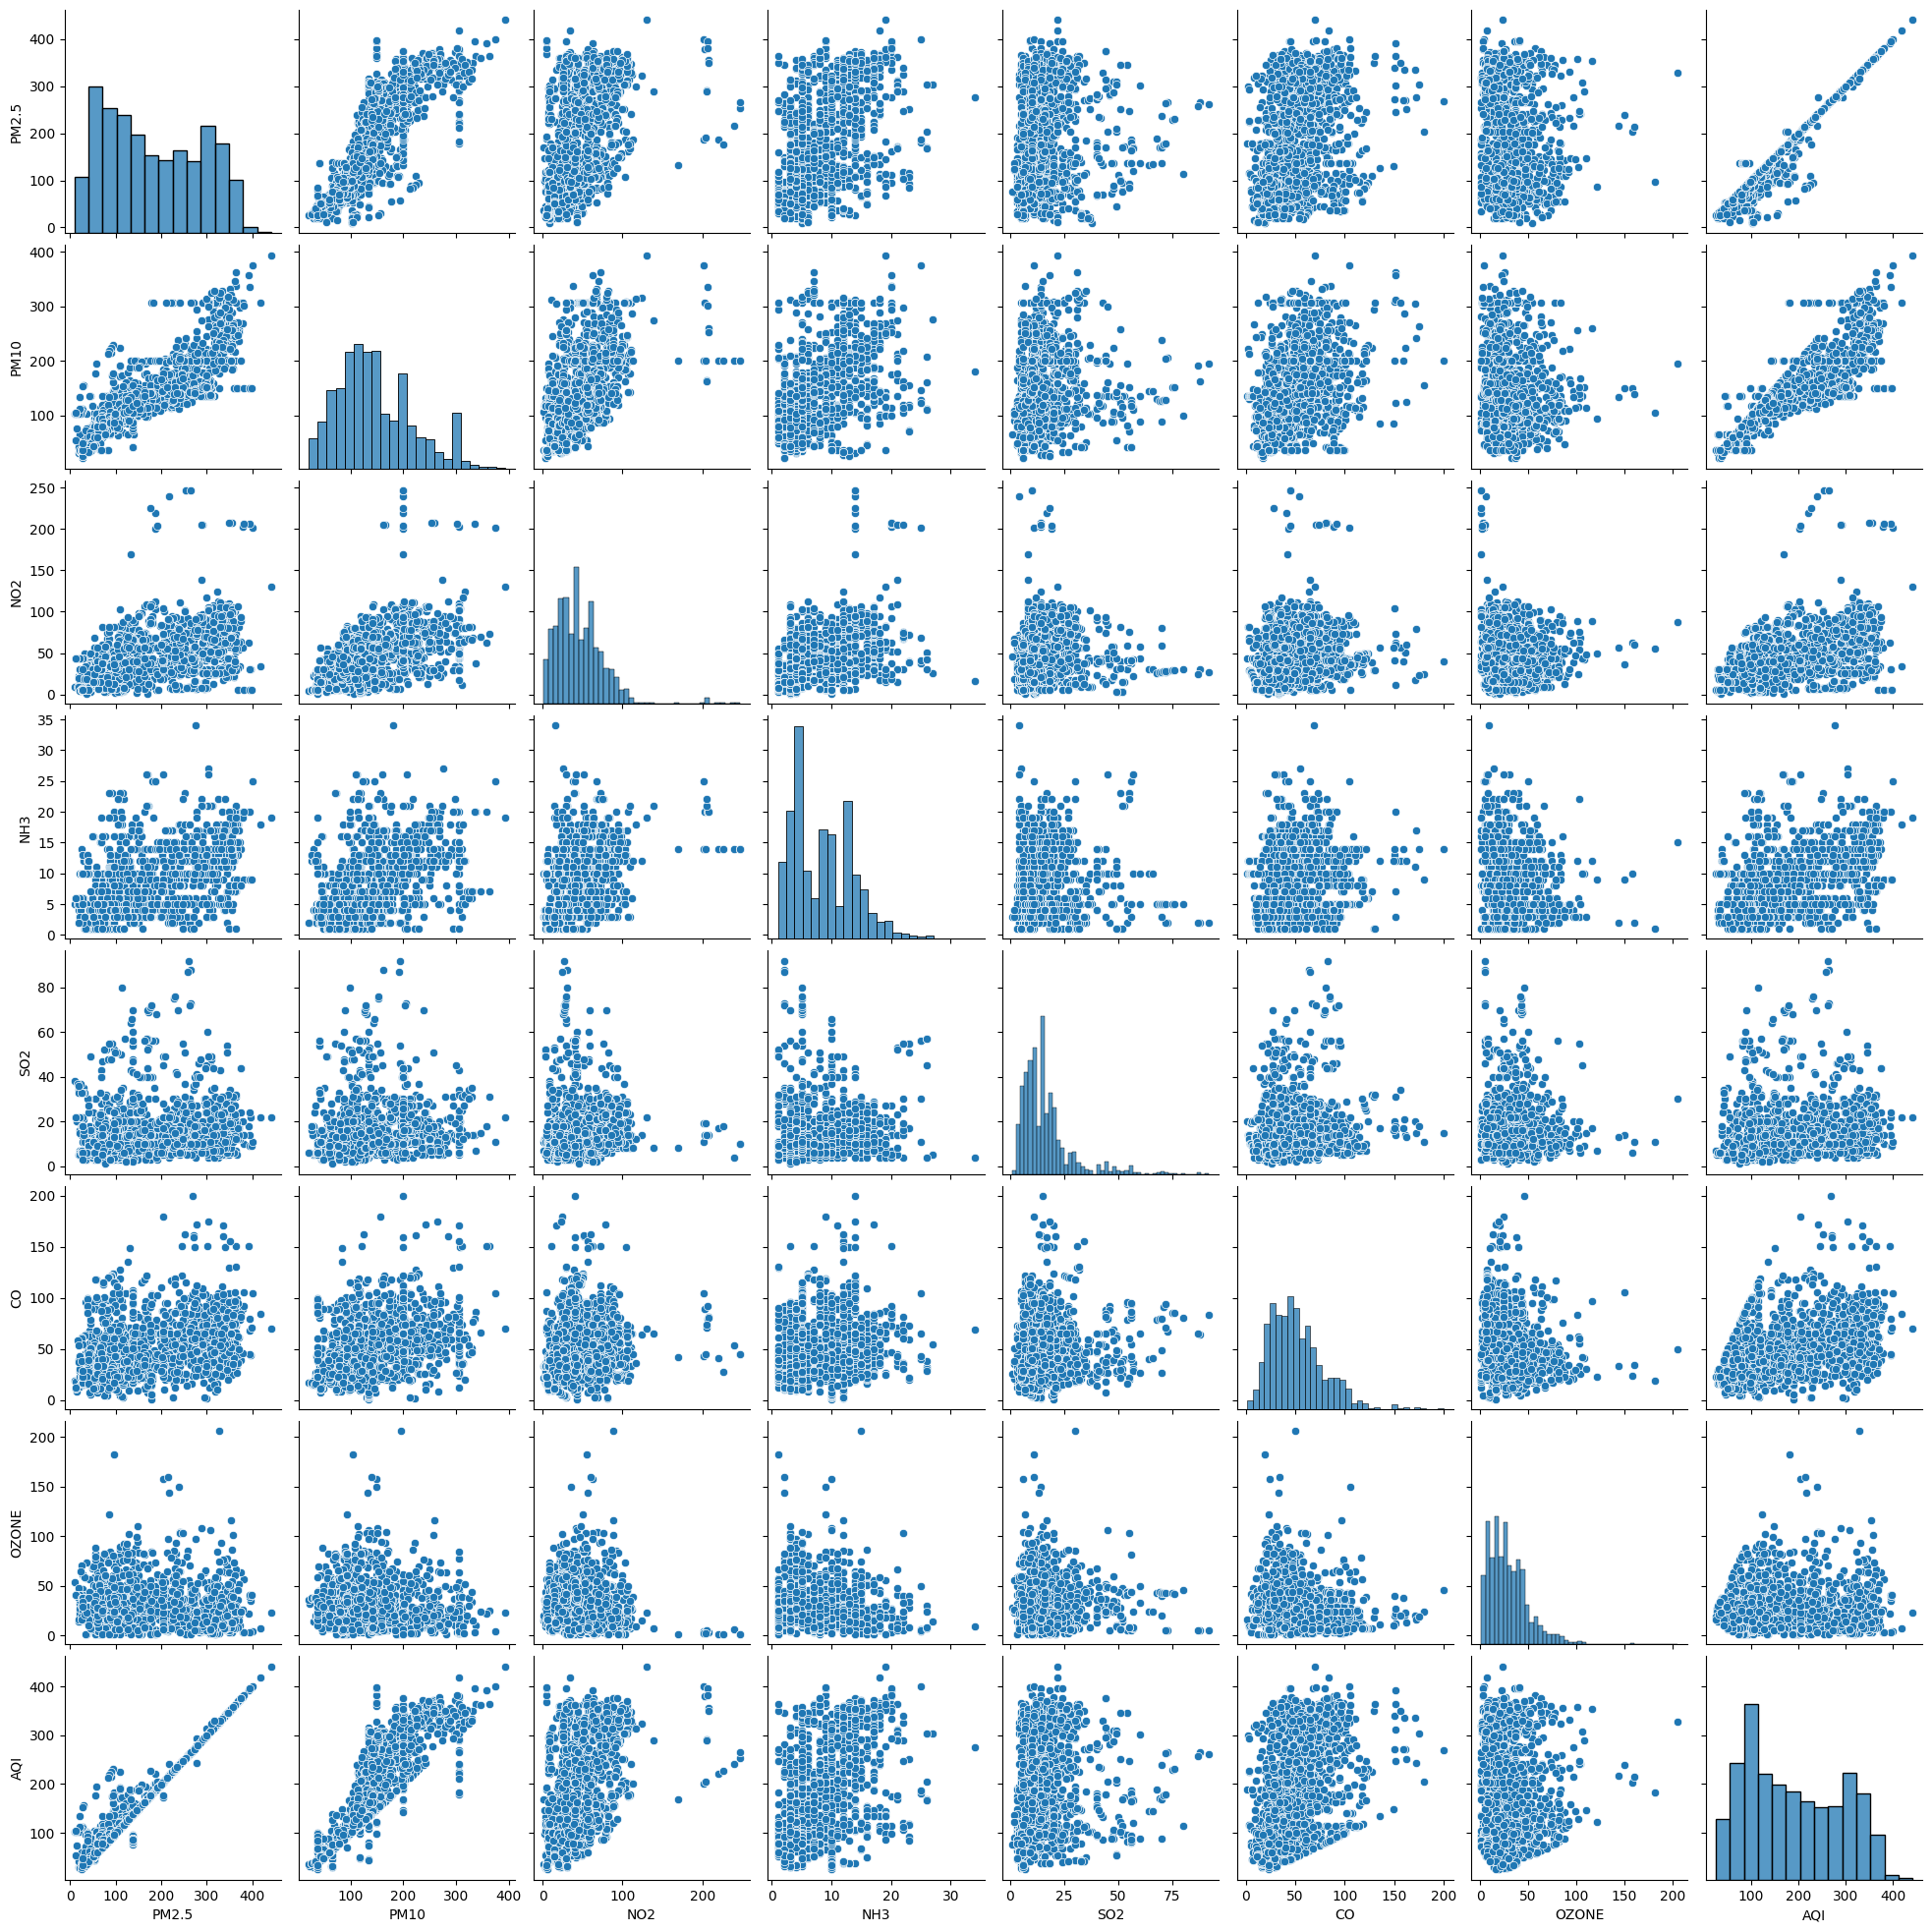

In [206]:
sns.pairplot(df)

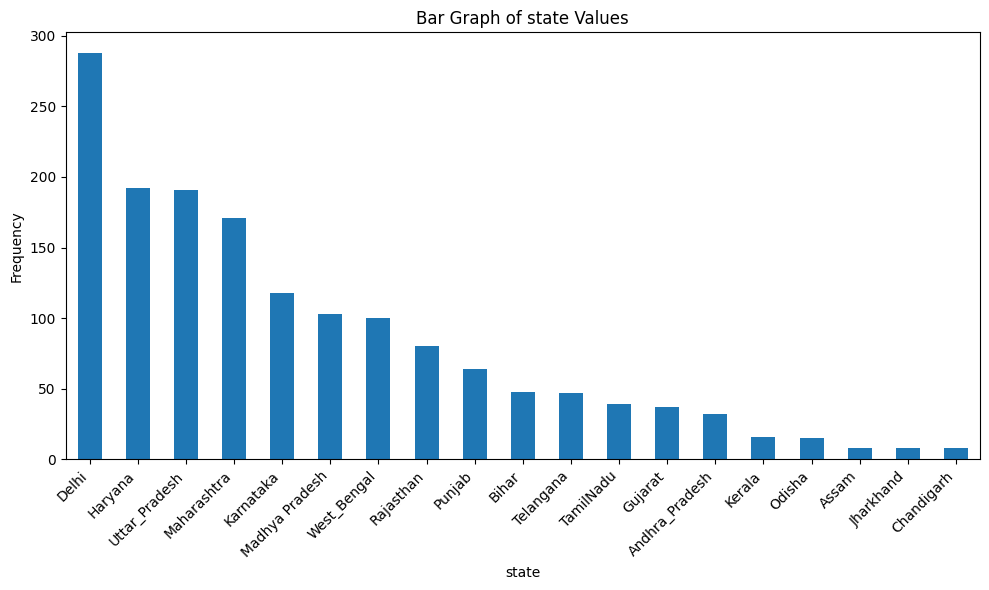

In [140]:

# Assuming 'df' is your DataFrame and you want to visualize counts of each unique value in a column
# Replace 'column_name' with the actual column you want to plot.
column_name = 'state'  # Example column. Change as needed.

if column_name in df.columns:
    value_counts = df[column_name].value_counts()
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    value_counts.plot(kind='bar')
    plt.title(f'Bar Graph of {column_name} Values')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability if needed
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print(f"Column '{column_name}' not found in DataFrame.")


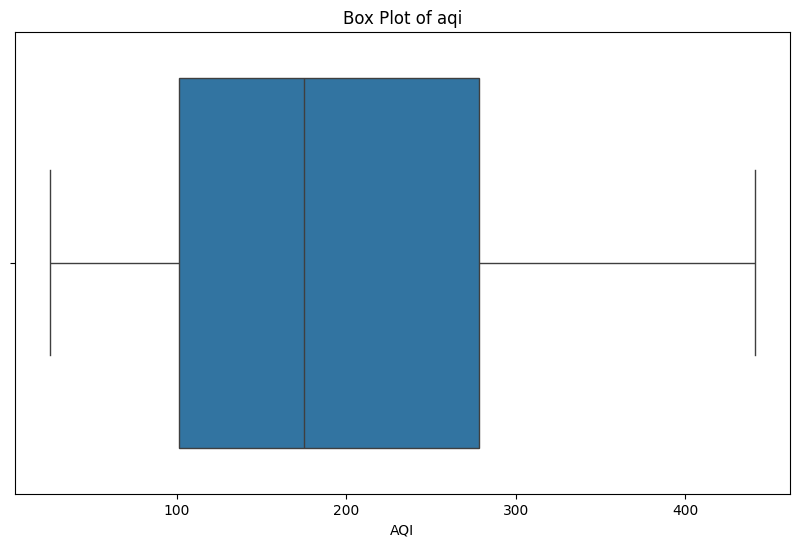

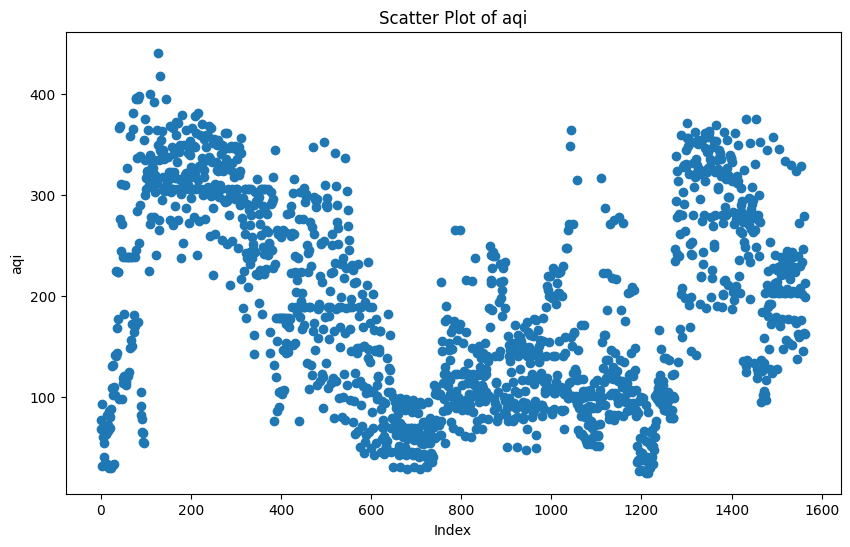

In [142]:
# prompt: also plt for outlier

import seaborn as sns

# Box plot for outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['AQI']) # Replace 'aqi' with your desired column
plt.title('Box Plot of aqi')
plt.show()

#Scatter plot for outlier detection
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['AQI'])
plt.title('Scatter Plot of aqi')
plt.xlabel('Index')
plt.ylabel('aqi')
plt.show()

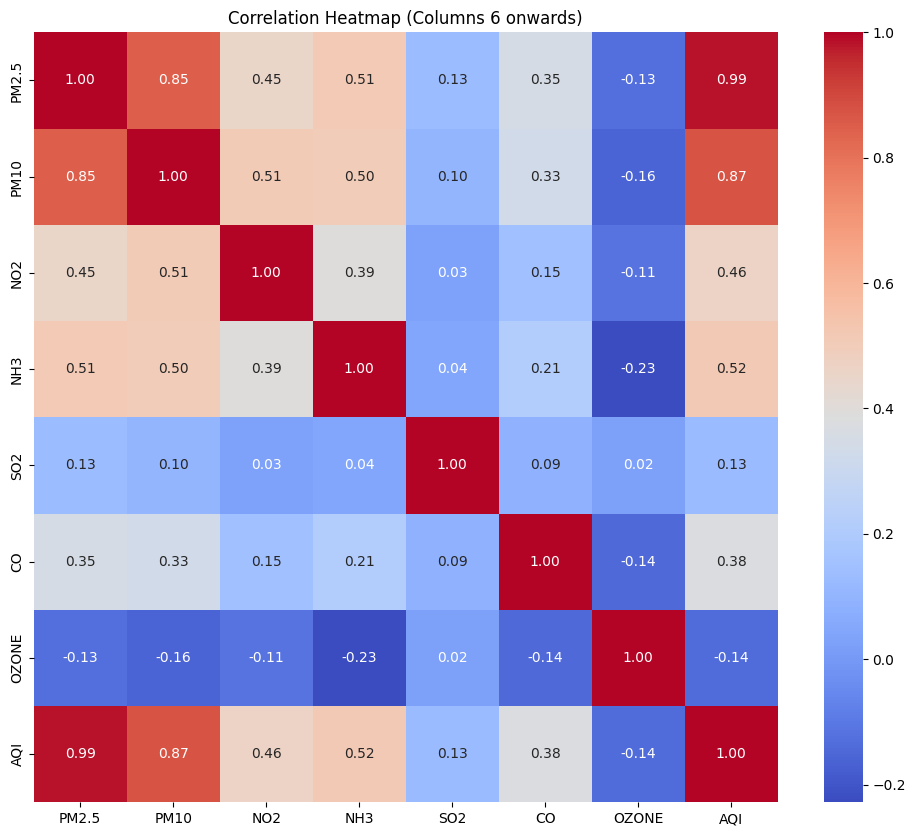

In [129]:
# prompt: don't use starting 5 column plot a heat map

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Select columns starting from the 6th column
columns_to_plot = df.columns[5:13]

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[columns_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Columns 6 onwards)')
plt.show()

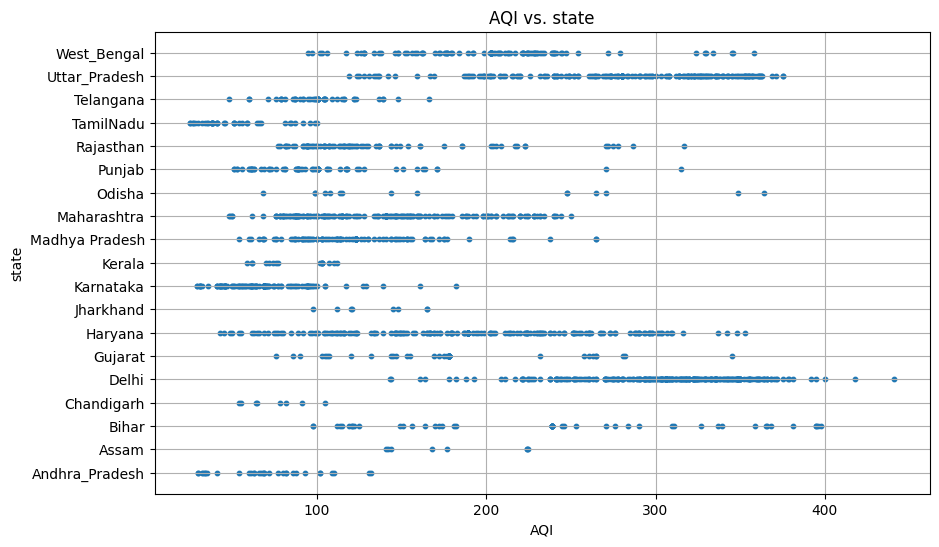

In [62]:
# prompt: plot a dot grafh between AQI And stat

import matplotlib.pyplot as plt

# Assuming 'AQI' and 'stat' are column names in your DataFrame 'df'
plt.figure(figsize=(10, 6))
plt.scatter(df['AQI'], df['state'], s=10)  # s controls the size of the dots
plt.xlabel('AQI')
plt.ylabel('state')
plt.title('AQI vs. state')
plt.grid(True)
plt.show()

In [67]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0:
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return ((sum/len(predicted))**0.5)[0]

In [161]:
x1 = df.iloc[:,5:12].values
print(x1)
z1 = pd.DataFrame(x1)

y1 = df.iloc[:,12:13].values
print(y1)
z2 = pd.DataFrame(y1)

ohe = OneHotEncoder()
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:,[0]]).toarray()) #state
x_new2 = pd.DataFrame(ohe.fit_transform(x1[:,[1]]).toarray()) #city
x_new3 = pd.DataFrame(ohe.fit_transform(x1[:,[2]]).toarray()) #station

feature_set = pd.concat([x_new1,x_new2,x_new3,pd.DataFrame(x1[:,5:12])],axis=1,sort=False)


x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

[[ 68  64  17 ...  28  31  40]
 [ 67  70  23 ...  13  49  77]
 [ 32  64  26 ...   6  19  16]
 ...
 [162 136  43 ...  16  34  44]
 [213 152  55 ...  11  95  64]
 [199 166  60 ...   6  29  36]]
[[ 68]
 [ 77]
 [ 32]
 ...
 [162]
 [213]
 [199]]


((1173, 7), (392, 7), (1173, 1), (392, 1))

In [125]:
feature_set

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68,64,17,4,28,31,40
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,67,70,23,2,13,49,77
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32,64,26,5,6,19,16
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,93,93,31,3,9,57,61
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,60,55,20,5,18,29,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,163,142,57,7,10,39,8
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,279,215,78,11,23,31,53
1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,162,136,43,4,16,34,44
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,213,152,55,5,11,95,64


In [162]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [201]:
cbr=CatBoostRegressor(learning_rate=0.1, iterations=1000, depth=6, random_state=42, cat_features=[])  # You can choose the best value for n_neighbors
cbr.fit(X_train_scaled, y_train.ravel())
cbr_y_predictions = cbr.predict(X_test_scaled)


0:	learn: 91.5521263	total: 55.2ms	remaining: 55.2s
1:	learn: 83.8261736	total: 61.9ms	remaining: 30.9s
2:	learn: 76.7544197	total: 64.7ms	remaining: 21.5s
3:	learn: 70.2729885	total: 69.4ms	remaining: 17.3s
4:	learn: 64.2309865	total: 72.4ms	remaining: 14.4s
5:	learn: 58.5610878	total: 75.6ms	remaining: 12.5s
6:	learn: 53.8970943	total: 79.7ms	remaining: 11.3s
7:	learn: 49.5483233	total: 83.5ms	remaining: 10.4s
8:	learn: 45.6561901	total: 87.4ms	remaining: 9.62s
9:	learn: 41.8872954	total: 91.1ms	remaining: 9.02s
10:	learn: 38.6280340	total: 95ms	remaining: 8.54s
11:	learn: 35.5390136	total: 99.2ms	remaining: 8.17s
12:	learn: 32.6528816	total: 104ms	remaining: 7.86s
13:	learn: 30.3081239	total: 107ms	remaining: 7.52s
14:	learn: 28.1992268	total: 108ms	remaining: 7.09s
15:	learn: 26.1250533	total: 109ms	remaining: 6.72s
16:	learn: 24.4276004	total: 110ms	remaining: 6.38s
17:	learn: 22.7187668	total: 112ms	remaining: 6.09s
18:	learn: 21.2264714	total: 114ms	remaining: 5.86s
19:	learn: 1

In [203]:
rmse_cbr = sqrt(metrics.mean_squared_error(y_test, cbr_y_predictions))
mae_cbr = metrics.mean_absolute_error(y_test, cbr_y_predictions)
r2_cbr = metrics.r2_score(y_test,cbr_y_predictions)
rmsle_etcbr = rmsle(y_test, cbr_y_predictions)

print(f"Error Metrics for Test data (cbr):\n rmse_cbr: {rmse_cbr} \n mae_cbr: {mae_cbr}\n r2_cbr: {r2_cbr}\n rmsle_cbr: {rmsle_etcbr}")

Error Metrics for Test data (cbr):
 rmse_cbr: 4.4793697519116105 
 mae_cbr: 3.009847379960699
 r2_cbr: 0.9977018135232373
 rmsle_cbr: 0.047011354465435605


In [197]:
etr= ExtraTreesRegressor(random_state=42,n_estimators=200,max_depth=None,min_samples_split= 2)  # You can choose the best value for n_neighbors
etr.fit(X_train_scaled, y_train.ravel())
etr_y_predictions = etr.predict(X_test_scaled)

In [198]:
rmse_etr = sqrt(metrics.mean_squared_error(y_test, etr_y_predictions))
mae_etr = metrics.mean_absolute_error(y_test, etr_y_predictions)
r2_etr = metrics.r2_score(y_test,etr_y_predictions)
rmsle_etr = rmsle(y_test, etr_y_predictions)

print(f"Error Metrics for Test data (etr):\n rmse_etr: {rmse_etr} \n mae_etr: {mae_etr}\n r2_etr: {r2_etr}\n rmsle_etr: {rmsle_etr}")

Error Metrics for Test data (etr):
 rmse_etr: 3.318311075360046 
 mae_etr: 1.4681377551020414
 r2_etr: 0.998738795150609
 rmsle_etr: 0.03779855423402831


### KNeighbors Regressor model

In [163]:
knn = KNeighborsRegressor(n_neighbors=5)  # You can choose the best value for n_neighbors
knn.fit(X_train_scaled, y_train)
knn_y_predictions = knn.predict(X_test_scaled)

KNN Test data results:

In [164]:
rmse_knn = sqrt(metrics.mean_squared_error(y_test, knn_y_predictions))
mae_knn = metrics.mean_absolute_error(y_test, knn_y_predictions)
r2_knn = metrics.r2_score(y_test,knn_y_predictions)
rmsle_knn = rmsle(y_test, knn_y_predictions)

print(f"Error Metrics for Test data (knn):\n rmse_knn: {rmse_knn} \n mae_knn: {mae_knn}\n r2_knn: {r2_knn}\n rmsle_knn: {rmsle_knn}")

Error Metrics for Test data (knn):
 rmse_knn: 20.402805929477406 
 mae_knn: 14.614285714285712
 r2_knn: 0.9523205501098397
 rmsle_knn: 0.14303216357082654


### Gradient Boosting Regressor model

In [165]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train_scaled, y_train.ravel())
gbr_y_predictions = gbr.predict(X_test_scaled)


**GBR Test data results:**

In [166]:
# Calculate RMSLE
rmse_gbr = sqrt(metrics.mean_squared_error(y_test, gbr_y_predictions))
mae_gbr = metrics.mean_absolute_error(y_test, gbr_y_predictions)
r2_gbr = metrics.r2_score(y_test,gbr_y_predictions)
rmsle_gbr = rmsle(y_test, gbr_y_predictions)

print(f"Error Metrics for Test data (gbr):\n rmse_gbr: {rmse_gbr} \n mae_gbr: {mae_gbr}\n r2_gbr: {r2_gbr}\n rmsle_gbr: {rmsle_gbr}")

Error Metrics for Test data (gbr):
 rmse_gbr: 6.31286002347979 
 mae_gbr: 3.869279714310778
 r2_gbr: 0.9954353891496995
 rmsle_gbr: 0.06454700807731648


### Multiple linear regression model

In [167]:
mreg = LinearRegression()
mreg.fit(X_train_scaled,y_train)

mlr_y_predict = mreg.predict(X_test_scaled)

##### MLR Test data results:

In [168]:
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)
rmsle_mlr = rmsle(y_test,mlr_y_predict)

print(f"Error Metrics for Test data (MLR):\n rmse_mlr: {rmse_mlr} \n mae_mlr: {mae_mlr}\n r2_mlr: {r2_mlr}\n rmsle_mlr: {rmsle_mlr}")

Error Metrics for Test data (MLR):
 rmse_mlr: 15.780950282215871 
 mae_mlr: 10.029004732886632
 r2_mlr: 0.9714755196052458
 rmsle_mlr: 0.13713974612606383


### polynomial regression model
degree = 2

In [169]:
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(X_train_scaled)
preg.fit(pf,y_train)

pr_y_predict = preg.predict(poly_reg.fit_transform(X_test_scaled))

##### PR Test data results:

In [170]:
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)
rmsle_pr = rmsle(y_test,pr_y_predict)

print(f"Error Metrics for Test data (PR):\n rmse_pr: {rmse_pr} \n mae_pr: {mae_pr}\n r2_pr: {r2_pr}\n rmsle_pr: {rmsle_pr}")

Error Metrics for Test data (PR):
 rmse_pr: 9.184124821849437 
 mae_pr: 6.20153261600747
 r2_pr: 0.9903388907321558
 rmsle_pr: 0.08904578648074155


### Decision Tree regression model

In [171]:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(X_train_scaled,y_train)

dt_y_predict = dec_tree.predict(X_test_scaled)

##### Decision Tree Test data results:

In [172]:
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)
rmsle_dt = rmsle(y_test,dt_y_predict)

print(f"Error Metrics for Test data (DT):\n rmse_dt: {rmse_dt} \n mae_dt: {mae_dt}\n r2_dt: {r2_dt}\n rmsle_dt: {rmsle_dt}")

Error Metrics for Test data (DT):
 rmse_dt: 5.952404761857143 
 mae_dt: 2.2168367346938775
 r2_dt: 0.9959417728715818
 rmsle_dt: 0.054051638757271744


### RFR regression model

In [173]:
rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(X_train_scaled,y_train)

rt_y_predict = rt_reg.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


##### RFR Test data results:

In [174]:
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)
rmsle_rt = rmsle(y_test,rt_y_predict)

print(f"Error Metrics for Test data:\n rmse_rt: {rmse_rt} \n mae_rt: {mae_rt}\n r2_rt: {r2_rt}\n rmsle_rt: {rmsle_rt}")

Error Metrics for Test data:
 rmse_rt: 4.521669534314844 
 mae_rt: 2.0100561224489795
 r2_rt: 0.9976582039105703
 rmsle_rt: 0.04594979691699555


### SVR regression model

In [175]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_svr = sc_x.fit_transform(x_train)
y_train_svr = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_train_svr,y_train_svr)

svr_y_predict = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_test)).reshape(1,-1))

##### SVR Test data results:

In [176]:
rmse_svr = sqrt(metrics.mean_squared_error(y_test, svr_y_predict.T))
mae_svr = metrics.mean_absolute_error(y_test, svr_y_predict.T)
r2_svr = metrics.r2_score(y_test,svr_y_predict.T)
rmsle_svr = rmsle(y_test,svr_y_predict.T)

print(f"Error Metrics for Test data:\n rmse_svr: {rmse_svr} \n mae_svr: {mae_svr}\n r2_svr: {r2_svr}\n rmsle_svr: {rmsle_svr}")

Error Metrics for Test data:
 rmse_svr: 9.531292310955493 
 mae_svr: 6.852817737812549
 r2_svr: 0.9895946901619778
 rmsle_svr: 0.08216988151900403


In [204]:
print("evaluating on testing data:")
print("----------------------------------------")
print("models\tR^2\tRMSE\tMAE\tRMSLE")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_mlr,rmse_mlr,mae_mlr,rmsle_mlr))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(r2_pr,rmse_pr,mae_pr,rmsle_pr))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_dt,rmse_dt,mae_dt,rmsle_dt))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_rt,rmse_rt,mae_rt,rmsle_rt))
print("SVR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_svr,rmse_svr,mae_svr,rmsle_svr))
print("GBR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_gbr,rmse_gbr,mae_gbr,rmsle_gbr))
print("knn\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_knn,rmse_knn,mae_knn,rmsle_knn))
print("etr\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_etr,rmse_etr,mae_etr,rmsle_etr))
print("cbr\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_cbr,rmse_cbr,mae_cbr,rmsle_etcbr))

evaluating on testing data:
----------------------------------------
models	R^2	RMSE	MAE	RMSLE
MLR	0.9715	15.7810	10.0290	0.1371
PR	0.99	9.18	6.202	0.0890
DTR	0.9959	5.9524	2.2168	0.0541
RFR	0.9977	4.5217	2.0101	0.0459
SVR	0.9896	9.5313	6.8528	0.0822
GBR	0.9954	6.3129	3.8693	0.0645
knn	0.9523	20.4028	14.6143	0.1430
etr	0.9987	3.3183	1.4681	0.0378
cbr	0.9977	4.4794	3.0098	0.0470


## Plotting Actual vs Predicted AQI

In [83]:
import matplotlib.pyplot as plt

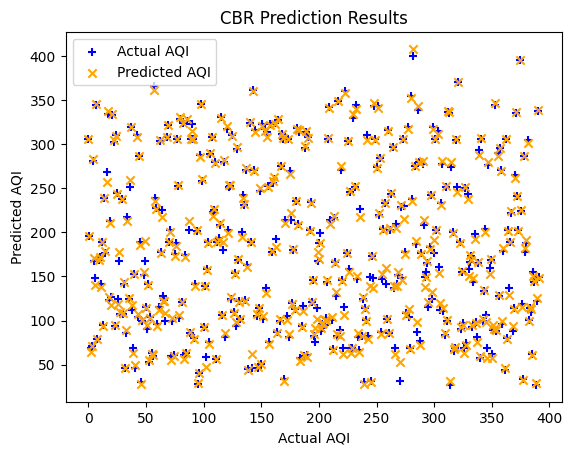

In [205]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(cbr_y_predictions)), cbr_y_predictions, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('CBR Prediction Results')
plt.legend()
plt.show()

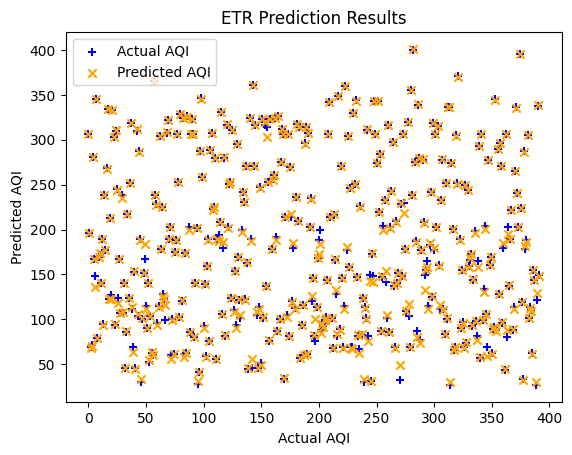

In [200]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(etr_y_predictions)), etr_y_predictions, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('ETR Prediction Results')
plt.legend()
plt.show()

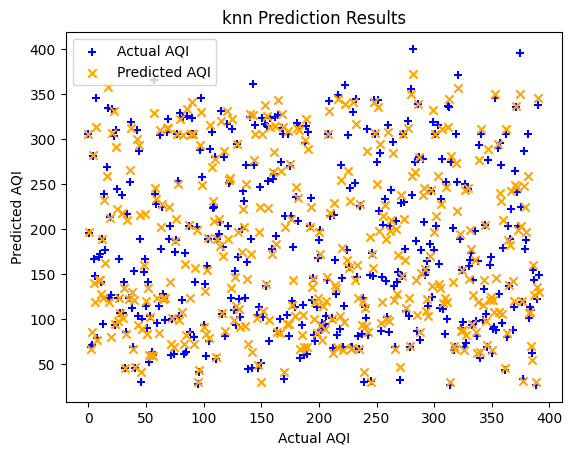

In [178]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(knn_y_predictions)), knn_y_predictions, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('knn Prediction Results')
plt.legend()
plt.show()

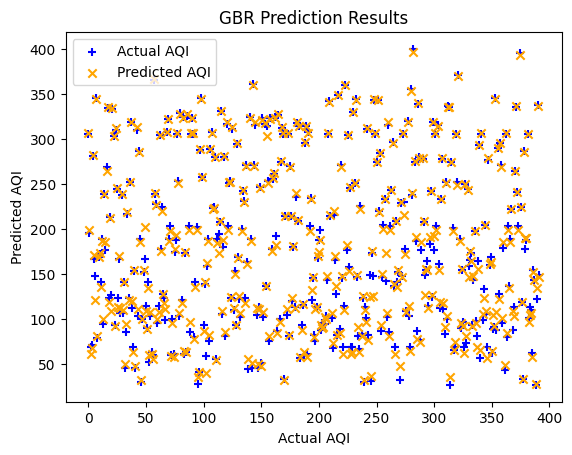

In [179]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(gbr_y_predictions)), gbr_y_predictions, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('GBR Prediction Results')
plt.legend()
plt.show()

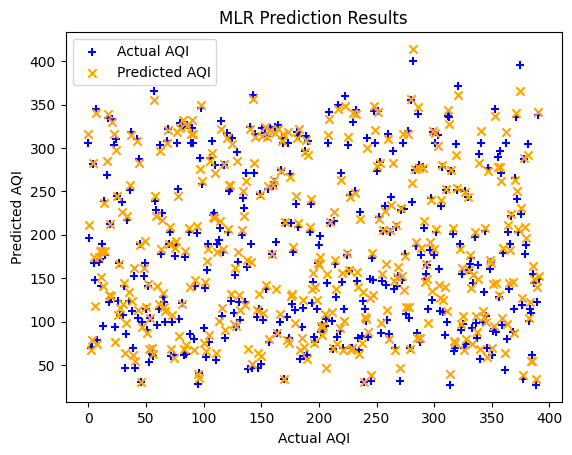

In [180]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(mlr_y_predict)), mlr_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('MLR Prediction Results')
plt.legend()
plt.show()

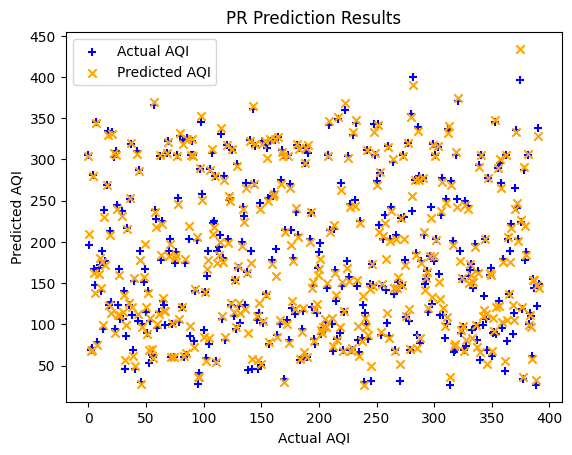

In [181]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(pr_y_predict)), pr_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('PR Prediction Results')
plt.legend()
plt.show()

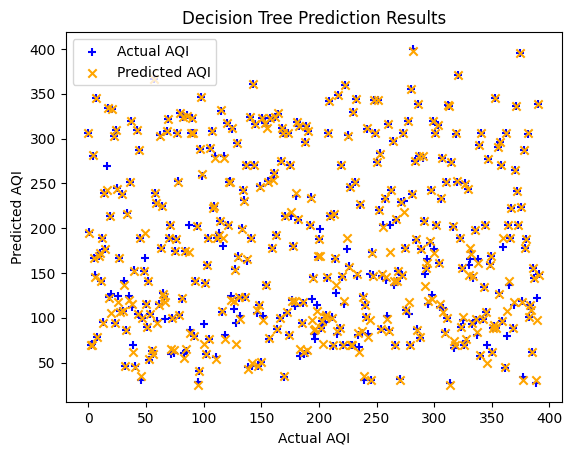

In [182]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(dt_y_predict)), dt_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Decision Tree Prediction Results')
plt.legend()
plt.show()

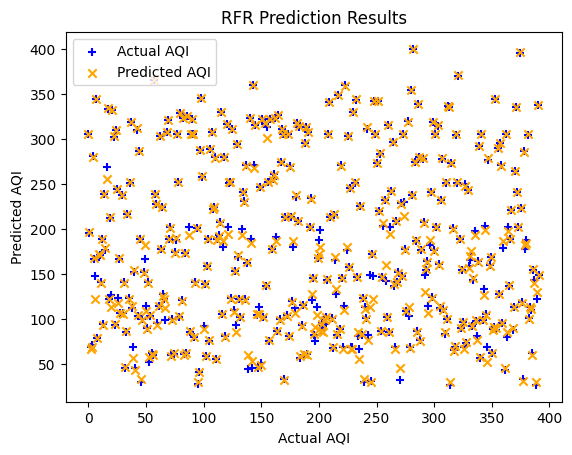

In [183]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(rt_y_predict)), rt_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('RFR Prediction Results')
plt.legend()
plt.show()

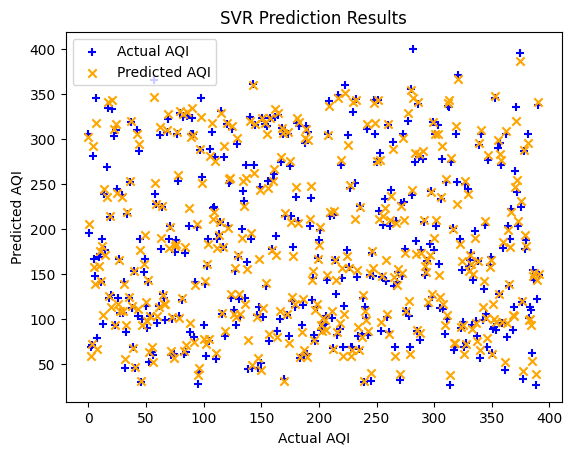

In [184]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(svr_y_predict.T)), svr_y_predict.T, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('SVR Prediction Results')
plt.legend()
plt.show()

In [187]:
# prompt: Also make a classificion base on AQI of all result Without city name with All models show all column

import pandas as pd

def classify_aqi(aqi_value):
    if aqi_value <= 50:
        return "Good"
    elif aqi_value <= 100:
        return "Moderate"
    elif aqi_value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi_value <= 200:
        return "Unhealthy"
    elif aqi_value <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Assuming 'df' is your DataFrame and 'y_test', 'knn_y_predictions', etc., are your prediction results
# Create a new DataFrame to store the results

results_df = pd.DataFrame({
    'Actual AQI': y_test.flatten(),
    'KNN Prediction': knn_y_predictions.flatten(),
    'GBR Prediction': gbr_y_predictions.flatten(),
    'MLR Prediction': mlr_y_predict.flatten(),
    'PR Prediction': pr_y_predict.flatten(),
    'DT Prediction': dt_y_predict.flatten(),
    'RFR Prediction': rt_y_predict.flatten(),
    'SVR Prediction': svr_y_predict.flatten()
})


# Apply the classification function to all prediction columns
for col in results_df.columns[1:]:  # Skip the 'Actual AQI' column
  results_df[f'{col} Class'] = results_df[col].apply(classify_aqi)


results_df['Actual AQI Class'] = results_df['Actual AQI'].apply(classify_aqi)

results_df

,Actual AQI,KNN Prediction,GBR Prediction,MLR Prediction,PR Prediction,DT Prediction,RFR Prediction,SVR Prediction,KNN Prediction Class,GBR Prediction Class,MLR Prediction Class,PR Prediction Class,DT Prediction Class,RFR Prediction Class,SVR Prediction Class,Actual AQI Class
0,306,306.0,306.231497,315.756317,304.373160,306.0,306.000,301.914308,Hazardous,Hazardous,Hazardous,Hazardous,Hazardous,Hazardous,Hazardous,Hazardous
1,196,196.6,199.066490,210.775134,209.762827,195.0,196.666,205.219216,Unhealthy,Unhealthy,Very Unhealthy,Very Unhealthy,Unhealthy,Unhealthy,Very Unhealthy,Unhealthy
2,69,66.6,61.392789,67.766936,68.235270,69.0,67.396,59.384287,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
3,71,86.2,68.068329,78.301433,69.145677,69.0,69.300,72.293991,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
4,281,282.2,282.408131,282.183591,279.707213,282.0,280.546,291.709827,Very Unhealthy,Very Unhealthy,Very Unhealthy,Very Unhealthy,Very Unhealthy,Very Unhealthy,Very Unhealthy,Very Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,144,127.2,143.137015,148.974299,154.103588,144.0,140.492,150.965457,Unhealthy for Sensitive Groups,Unhealthy for Sensitive Groups,Unhealthy for Sensitive Groups,Unhealthy,Unhealthy for Sensitive Groups,Unhealthy for Sensitive Groups,Unhealthy,Unhealthy for Sensitive Groups
388,27,30.2,28.403742,34.304292,33.043657,30.0,30.788,38.933519,Good,Good,Good,Good,Good,Good,Good,Good
389,122,136.2,134.347881,139.523013,147.321991,98.0,130.174,144.012468,Unhealthy for Sensitive Groups,Unhealthy for Sensitive Groups,Unhealthy for Sensitive Groups,Unhealthy for Sensitive Groups,Moderate,Unhealthy for Sensitive Groups,Unhealthy for Sensitive Groups,Unhealthy for Sensitive Groups
390,338,346.0,336.312070,341.103866,328.305197,338.0,338.276,341.573529,Hazardous,Hazardous,Hazardous,Hazardous,Hazardous,Hazardous,Hazardous,Hazardous


In [109]:
# Install necessary package for widgets
!pip install ipywidgets --quiet

import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

In [216]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

def predict_aqi_colab(models, scaler, feature_columns):
    """
    Create an interactive widget interface in Colab for AQI prediction.

    Parameters:
    - models: Dictionary of trained models (e.g., {"Model Name": model_object})
    - scaler: Scaler used for standardizing the features
    - feature_columns: List of feature names in the model
    """
    # Create input widgets for each feature
    inputs = {feature: widgets.FloatText(description=f"{feature}:", value=0) for feature in feature_columns}
    submit_button = widgets.Button(description="Predict AQI", button_style="success")
    output = widgets.Output()

    def on_submit(change):
        with output:
            clear_output(wait=True)
            try:
                # Collect user inputs
                user_input = np.array([inputs[feature].value for feature in feature_columns]).reshape(1, -1)
                user_input_scaled = scaler.transform(user_input)

                # Predict AQI using each model
                result_text = "Predictions:\n"
                for model_name, model in models.items():
                    predicted_aqi = model.predict(user_input_scaled)

                    # Ensure the prediction is a scalar value
                    if isinstance(predicted_aqi, np.ndarray):
                        predicted_aqi = predicted_aqi.item()  # Convert ndarray to scalar value

                    result_text += f"{model_name}: {predicted_aqi:.2f} :{classify_aqi(predicted_aqi)}\n"

                # Display predictions
                print(result_text)
            except Exception as e:
                print(f"Error: {e}")

    # Attach event listener to the button
    submit_button.on_click(on_submit)

    # Display widgets
    display(widgets.VBox(list(inputs.values()) + [submit_button, output]))

# Example usage:
# Assuming models and scaler are defined in your .ipynb file
# Replace these with actual objects from your notebook:
models = {
    "Gradient Boosting Regressor": gbr,
    "Linear Regression": mreg,
    "Decision Tree Regressor": dec_tree,
    "Random Forest Regressor": rt_reg,
    "Support Vector Regressor": svr_reg,
    "KNeighbors Regressor":knn,
    "Extra Trees Regressor": etr,
    "CatBoost Regressor": cbr
}
scaler1 = scaler  # Replace with your StandardScaler object
feature_columns = z  # Replace with the list of feature names

# Call the function
predict_aqi_colab(models, scaler1, feature_columns)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

In [124]:

# def predict_aqi_colab(models, scaler, feature_columns, cities, states, stations):
#     """
#     Create an interactive widget interface in Colab for AQI prediction with categorical data.

#     Parameters:
#     - models: Dictionary of trained models (e.g., {"Model Name": model_object})
#     - scaler: Scaler used for standardizing the features
#     - feature_columns: List of feature names in the model
#     - cities: List of unique cities for one-hot encoding
#     - states: List of unique states for one-hot encoding
#     - stations: List of unique stations for one-hot encoding
#     """
#     # Create input widgets for each feature
#     inputs = {feature: widgets.FloatText(description=f"{feature}:", value=0) for feature in feature_columns}

#     # Create input widgets for categorical data (city, state, station)
#     city_widget = widgets.Dropdown(description="City:", options=cities)
#     state_widget = widgets.Dropdown(description="State:", options=states)
#     station_widget = widgets.Dropdown(description="Station:", options=stations)

#     submit_button = widgets.Button(description="Predict AQI", button_style="success")
#     output = widgets.Output()

#     # Initialize one-hot encoder for categorical data
#     encoder = OneHotEncoder(sparse=False)
#     encoder.fit(pd.DataFrame({
#         'city': cities,
#         'state': states,
#         'station': stations
#     }))  # Fit encoder to the unique values of city, state, and station

#     def on_submit(change):
#         with output:
#             clear_output(wait=True)
#             try:
#                 # Collect numerical inputs
#                 numerical_input = np.array([inputs[feature].value for feature in feature_columns]).reshape(1, -1)
#                 numerical_input_scaled = scaler.transform(numerical_input)

#                 # Collect categorical inputs and apply one-hot encoding
#                 categorical_input = np.array([[city_widget.value, state_widget.value, station_widget.value]])
#                 categorical_encoded = encoder.transform(categorical_input)

#                 # Combine numerical and categorical inputs
#                 full_input = np.concatenate([numerical_input_scaled, categorical_encoded], axis=1)

#                 # Predict AQI using each model
#                 result_text = "Predictions:\n"
#                 for model_name, model in models.items():
#                     predicted_aqi = model.predict(full_input)[0]
#                     result_text += f"{model_name}: {predicted_aqi:.2f}\n"

#                 # Display predictions
#                 print(result_text)
#             except Exception as e:
#                 print(f"Error: {e}")

#     # Attach event listener to the button
#     submit_button.on_click(on_submit)

#     # Display widgets
#     display(widgets.VBox(list(inputs.values()) + [city_widget, state_widget, station_widget, submit_button, output]))

# # Example usage:
# # Assuming models and scaler are defined in your .ipynb file
# # Replace these with actual objects from your notebook:
# models = {
#     "Gradient Boosting Regressor": gbr,
#     "Linear Regression": mreg ,
#     "Decision Tree Regressor": dec_tree,
#     "Random Forest Regressor": rt_reg,
#     "Support Vector Regressor": svr_reg ,    # Support Vector Regressor model
# }
# scaler1 = scaler  # Replace with your StandardScaler object
# feature_columns = feature_set  # Replace with the list of feature names
# cities = ['CityA', 'CityB', 'CityC']  # Example cities (replace with your actual city list)
# states = ['StateX', 'StateY', 'StateZ']  # Example states (replace with your actual state list)
# stations = ['Station1', 'Station2', 'Station3']  # Example stations (replace with your actual station list)

# # Call the function
# predict_aqi_colab(models, scaler1, feature_columns, cities, states, stations)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'